<h1>KELOMPOK 7</h1>
<p>Backend Flask Project Deteksi Emosi Berdasarkan Ekspresi Wajah (Facial Emotion Recognition) : Angry, Disgust, Fear, Happy, Neutral, Sad dan Suprise.</p>
<p>oleh: </p>
<li>Rio Pardomuan Marpaung</li>
<li>Muhammad Syahrul Nizam</li>
<li>Nada Marliani</li>



In [1]:
!pip install flask-ngrok
!pip install gevent
!pip install flask
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!ngrok authtoken 2BY20nYU5gs8tzppzFg3I1dsTAz_eEjEAcNaeL2k6UCCXRT9

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Import Library

from __future__ import division,print_function
#coding=utf-8
import sys
import os
import glob
import re
import numpy as np

#Keras
from keras.applications.imagenet_utils import preprocess_input,decode_predictions
from keras.models import load_model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

#Flask utils
from flask import Flask,redirect,url_for,request,render_template
from werkzeug.utils import secure_filename
from gevent.pywsgi import WSGIServer

In [5]:
import flask
from flask import request
import pandas as pd
import tensorflow as tf
import keras
import random
from os.path import join,dirname,realpath
from tensorflow.keras.preprocessing.image import img_to_array,load_img
from flask_ngrok import run_with_ngrok
from werkzeug.utils import secure_filename

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
 
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    plt.show()

In [9]:
#Create Flask
app = Flask(__name__) 
model = tf.keras.models.load_model('/content/drive/MyDrive/Developer/model.h5') 
run_with_ngrok(app) 
#Routing Flask
@app.route('/',methods=['GET'])
def index():
    return"<h1>Hello World</h1>"
@app.route('/predict',methods=['GET','POST'])
def upload():
  #Extract the image files into a list and shuffle it
  data={"success":False}
  namafile=''
  if request.method == 'POST':
    file=request.files['file']
    if file.filename == '':
      data["file"]="Tidak ada file"
    else:
      data["file"]="File berhasil di simpan"
      filename=secure_filename(file.filename)
      file.save('data_tes/'+file.filename)
      namafile='data_tes/'+file.filename
    
    true_image = image.load_img(namafile)
    img=load_img(namafile,target_size=(48,48), color_mode="grayscale")
    x=img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    #x=x.reshape((1,)+x.shape)
    x/=255.0

    custom = model.predict(x)
    emotion_analysis(custom[0])

    x = np.array(x, 'float32')
    x = x.reshape([48, 48]);

    plt.imshow(true_image)
    plt.show()

    x=x.reshape((1,)+x.shape)
    predict = model.predict(x,batch_size=1)
    print(predict)
    hasil=np.argmax(predict)
    temp=0
    label=0
    data["success"]=str(predict)
    data["label"]= str(hasil)
    print(data)
    return flask.jsonify(data)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://5a01-35-204-221-99.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


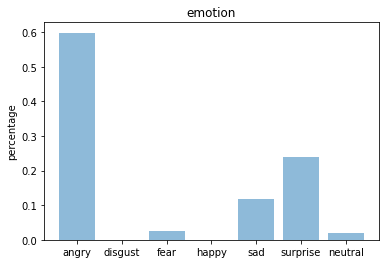

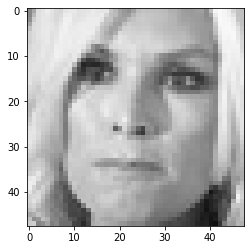

127.0.0.1 - - [02/Aug/2022 16:22:30] "POST /predict HTTP/1.1" 200 -


[[5.9812343e-01 3.2136971e-04 2.5169419e-02 3.8974636e-04 1.1883185e-01
  2.3893504e-01 1.8229181e-02]]
{'success': '[[5.9812343e-01 3.2136971e-04 2.5169419e-02 3.8974636e-04 1.1883185e-01\n  2.3893504e-01 1.8229181e-02]]', 'file': 'File berhasil di simpan', 'label': '0'}


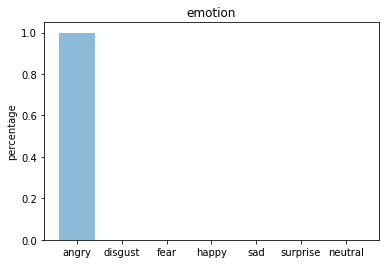

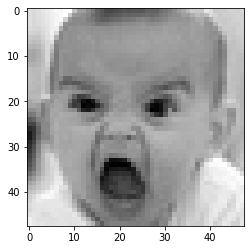

127.0.0.1 - - [02/Aug/2022 16:23:25] "POST /predict HTTP/1.1" 200 -


[[9.9899894e-01 6.6119036e-08 5.2813780e-06 6.6026452e-04 6.2512416e-05
  4.0711734e-06 2.6893421e-04]]
{'success': '[[9.9899894e-01 6.6119036e-08 5.2813780e-06 6.6026452e-04 6.2512416e-05\n  4.0711734e-06 2.6893421e-04]]', 'file': 'File berhasil di simpan', 'label': '0'}


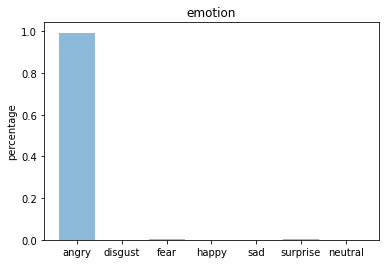

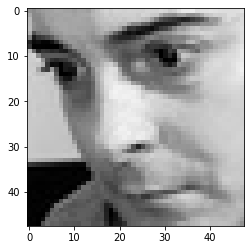

127.0.0.1 - - [02/Aug/2022 16:25:02] "POST /predict HTTP/1.1" 200 -


[[9.9321151e-01 7.5049541e-04 1.9959365e-03 1.7693567e-04 8.5970166e-04
  2.6945041e-03 3.1080318e-04]]
{'success': '[[9.9321151e-01 7.5049541e-04 1.9959365e-03 1.7693567e-04 8.5970166e-04\n  2.6945041e-03 3.1080318e-04]]', 'file': 'File berhasil di simpan', 'label': '0'}


In [ ]:
app.run()